# Results Code Archive

### Result Visualizations/Outputs

In [124]:
demographic_df = pd.merge(hh_econ[["PUMA","MdHInc_19E"]], race_dec[['PUMA','WNH20P','Hsp20P','BNH20P','ANH20P','OTwoNH20P']],
                         on='PUMA', how='inner')
master_cluster_df = pd.merge(df_1C, demographic_df, on='PUMA', how='inner')
master_cluster_df.to_excel('../outputs/cluster_8v_results_full.xlsx',index=False)

In [90]:
inc_df = pd.merge(hh_econ[["PUMA","MdHInc_19E"]],
                  df_1C[['PUMA','labels']], on='PUMA', how='inner')
inc_df.rename(columns={"MdHInc_19E":'Median Income'},inplace=True)

In [91]:
inc_dfNYC = hh_econNYC[["MdHInc_19E"]]
inc_dfNYC.rename(columns={"MdHInc_19E":'Median Income'},inplace=True)
inc_dfNYC['labels']=['NYC']

<ipython-input-91-652a77def6bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_dfNYC['labels']=['NYC']


In [76]:
race_df = pd.merge(race_dec[['PUMA','WNH20P','Hsp20P','BNH20P','ANH20P','OTwoNH20P']],
                   df_1C[['PUMA','labels']], on='PUMA', how='inner')
race_df.rename(columns={"WNH20P":'White NH',"Hsp20P":'Hispanic',"BNH20P":'Black NH',"ANH20P":'Asian NH',
                       "OTwoNH20P":'Multi-Race NH'},inplace=True)

<AxesSubplot:xlabel='labels'>

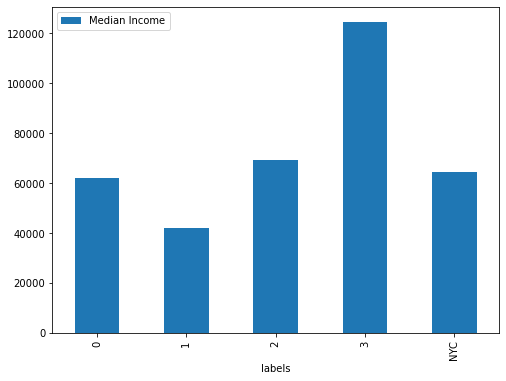

In [98]:
cluster_inc = inc_df.groupby(['labels']).agg({'Median Income':'mean'}).reset_index()
cluster_inc = cluster_inc.append(inc_dfNYC)
cluster_inc.plot.bar(x='labels',figsize=(8,6))

In [77]:
race_dfNYC = race_decNYC[['WNH20P','Hsp20P','BNH20P','ANH20P','OTwoNH20P']]
race_dfNYC.rename(columns={"WNH20P":'White NH',"Hsp20P":'Hispanic',"BNH20P":'Black NH',"ANH20P":'Asian NH',
                       "OTwoNH20P":'Multi-Race NH'},inplace=True)
race_dfNYC['labels']=['NYC']

<ipython-input-77-a0cdcae111da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_dfNYC['labels']=['NYC']


<AxesSubplot:xlabel='labels'>

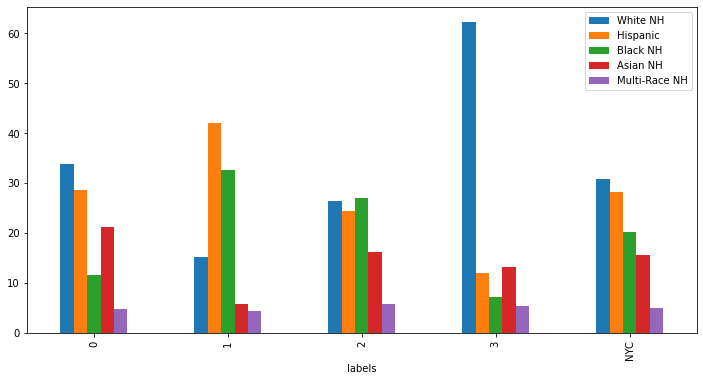

In [87]:
cluster_race = race_df.groupby(['labels']).agg({'White NH':'mean','Hispanic':'mean',
                                                 'Black NH':'mean','Asian NH':'mean',
                                                 'Multi-Race NH':'mean'}).reset_index()
cluster_race = cluster_race.append(race_dfNYC)
cluster_race.plot.bar(x='labels',figsize=(12,6))

In [125]:
cluster_summ = cluster_sum2.reset_index().iloc[:,:9]
cluster_summ

,labels,park_perc,job_perc,comp_access,bach_degr,empl_rate,rent_under30,subway_sbs,inf_mortality_inverse
0,0,95.414286,100.000000,89.614286,76.857143,95.814286,60.514286,72.368110,82.576286
1,1,75.547368,95.257895,75.336842,35.921053,94.000000,44.742105,43.734147,67.927079
2,2,67.493333,39.493333,76.720000,27.926667,93.513333,46.020000,22.260183,51.894540
3,3,96.978571,98.914286,66.264286,28.064286,90.814286,42.971429,67.994487,52.827029


In [133]:
df_inputs = reduce(lambda left, right: pd.merge(left, right, on=['PUMA'], how='outer'), data_frames)

df_inputs['empl_rate'] = df_inputs['CvEm1_19E']*100/df_inputs['LF_19E']
df_inputs['rent_under30'] = 100-df_inputs['GRPI30_19P']
df_inputs['rent_under50'] = 100-df_inputs['GRPI50_19P']
df_inputs['diploma'] = 100-df_inputs['LtHS_19P']
df_inputs['subway_sbs'] = 100*df_inputs['Percent']
del df_inputs['GRPI30_19P'],df_inputs['GRPI50_19P'],df_inputs['CvEm1_19E'],df_inputs['LF_19E'],df_inputs['Percent'],df_inputs['LtHS_19P']
df_inputs[['park_perc','job_perc','empl_rate']] = df_inputs[['park_perc','job_perc','empl_rate']].round(1)
df_inputs.rename(columns={'OOcc1_19P':'home_own','Comp_19P':'comp_access','BbInt_19P':'broadb_access','Bchpl_19P':'bach_degr',
                         'infant_mortality_per1000_16_20':'infant_mortality_per1000'},
                inplace=True)
df_inputs = df_inputs.iloc[:55, :].copy() # remove Na rows
df_inputs['labels'] = kmeans.labels_
df_inputs.head()

,PUMA,park_perc,job_perc,home_own,comp_access,broadb_access,bach_degr,infant_mortality_per1000,HVI,empl_rate,rent_under30,rent_under50,diploma,subway_sbs,labels
0,3603701,91.5,89.9,31.1,75.5,73.2,40.6,3.38511,2.0,93.0,46.1,70.7,81.8,23.991322,0
1,3603702,63.4,46.9,38.1,68.2,59.8,24.4,6.77924,3.0,90.6,39.3,65.5,80.3,32.176729,2
2,3603703,49.9,36.4,47.1,73.9,66.2,26.3,3.15060,1.0,92.4,50.3,70.6,83.1,13.331543,2
3,3603704,84.5,88.5,29.7,71.6,60.9,24.5,5.05051,4.0,91.5,41.8,69.7,78.4,44.007477,0
4,3603705,99.2,100.0,6.5,54.6,58.0,12.8,6.13354,5.0,87.4,36.1,61.3,65.6,39.494481,1


In [138]:
cluster_sumFin = df_inputs.groupby(['labels']).agg({'park_perc':'mean','job_perc':'mean',
                                                 'comp_access':'mean','bach_degr':'mean',
                                                 'empl_rate':'mean','rent_under30':'mean',
                                                 'subway_sbs':'mean','infant_mortality_per1000':'mean',
                                             'PUMA':'count'})
cluster_sumFin.to_excel('../outputs/cluster_8v_results_cleaned.xlsx')

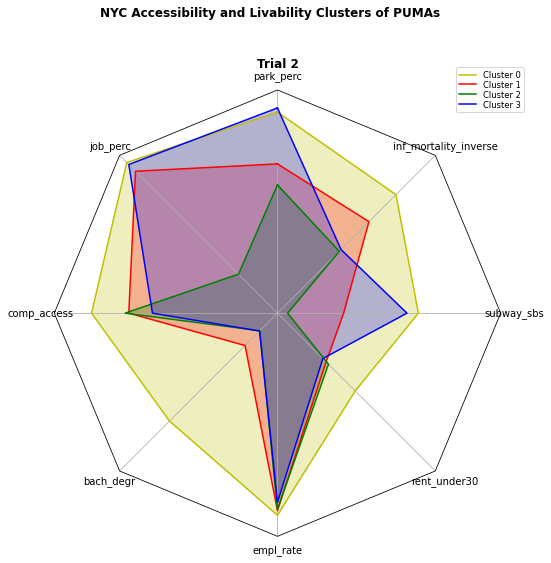

In [142]:
# radar chart code below

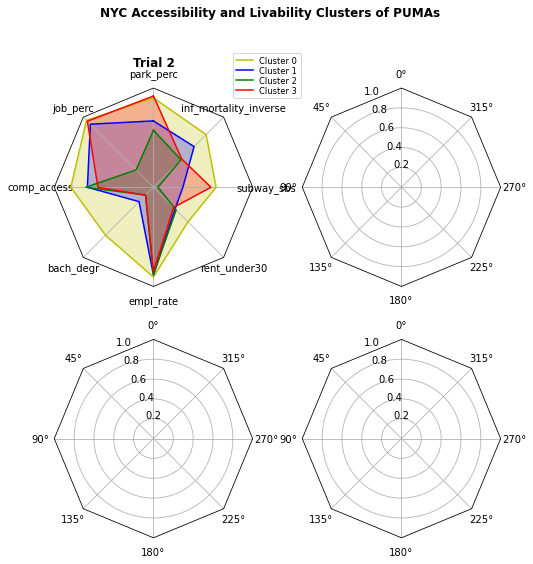

In [106]:
# radar chart code

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='polygon'):
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    class RadarAxes(PolarAxes):
        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)
    register_projection(RadarAxes)
    return theta

def example_data():
    data = [
        ['park_perc','job_perc','comp_access','bach_degr','empl_rate','rent_under30','subway_sbs','inf_mortality_inverse'],
        ('Trial 2', [
            [95.414286,100.00000,89.614286,76.857143,95.814286,60.514286,72.368110,82.576286],
            [75.547368,95.257895,75.336842,35.921053,94.000000,44.742105,43.734147,67.927079],
            [67.493333,39.493333,76.720000,27.926667,93.513333,46.020000,22.260183,51.894540],
            [96.978571,98.914286,66.264286,28.064286,90.814286,42.971429,67.994487,52.827029],
        ])
    ]
    return data

if __name__ == '__main__':
    N = 8
    title = 'NYC Accessibility and Livability Clusters of PUMAs'
    theta = radar_factory(N, frame='polygon')
    data = example_data()
    spoke_labels = data.pop(0)
    fig, axs = plt.subplots(figsize=(8, 8), nrows=2, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
    colors = ['y', 'b', 'g', 'r']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([1, 2, 3, 4, 5, 6, 7])
        ax.set_title(title, weight='bold', size='large', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)
    # ['b', 'r', 'g', 'm', 'y', 'c', 'k']
    # Plot the four cases from the example data on separate axes
#     ax.set_rgrids([1, 2, 3, 4, 5, 6, 7, 8])
#     ax.set_title(title, weight='bold', size='large', position=(0.5, 1.1),
#                  horizontalalignment='center', verticalalignment='center')
#     for d, color in zip(data, colors):
#         ax.plot(theta, d, color=color)
#         ax.fill(theta, d, facecolor=color, alpha=0.25)
#     ax.set_varlabels(spoke_labels)
    # add legend relative to top-left plot
    labels = ('Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3')
    legend = ax.legend(labels, loc=(0.9, 0.95),
                              labelspacing=0.1, fontsize='small')
    fig.text(0.5, 0.965, 'NYC Accessibility and Livability Clusters of PUMAs',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
    plt.show()